In [1]:
from PIL import Image
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib
from urllib.request import urlopen
import webcolors
from collections import Counter
import time
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

images = glob.glob("./Images/*")
dates = []
for i in images:
    dates.append(i[9:17])

img = Image.open("./Images/20220710.png")
img_array = np.array(img)



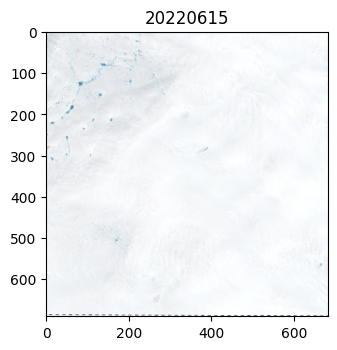

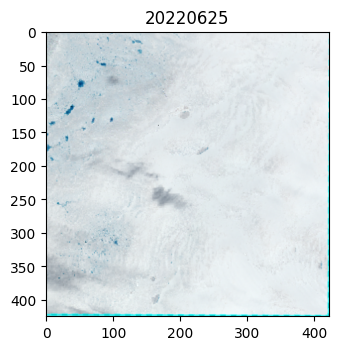

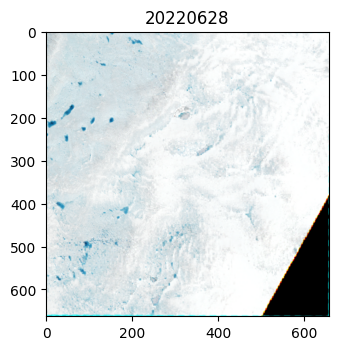

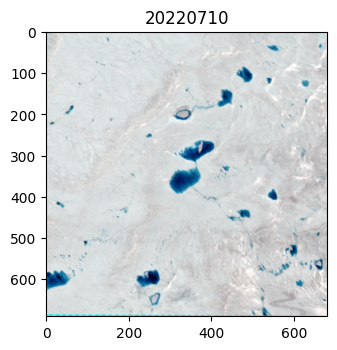

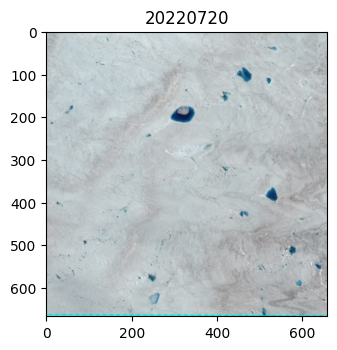

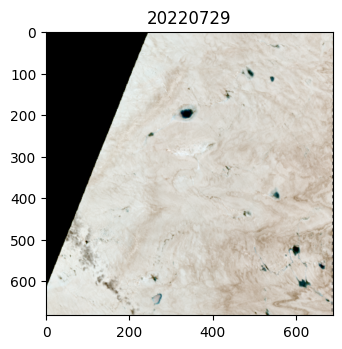

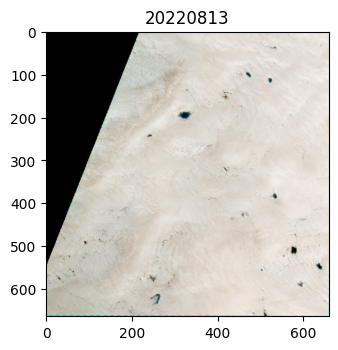

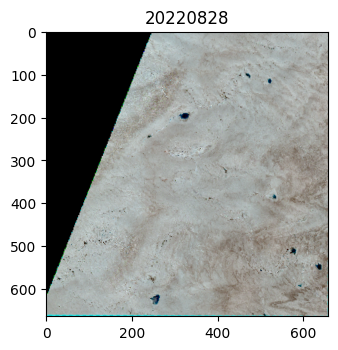

In [2]:
for i in range(len(dates)): 
    plt.figure(figsize=(17, 17))
    plt.subplot(4, 4, i+1)
    plt.title(dates[i])
    img = Image.open(f"./Images/{dates[i]}.png")
    img_arr = np.array(img)
    plt.imshow(img_arr)

In [3]:
image = cv2.imread(f"./Images/20220828.PNG")

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of colors to detect in HSV
lower_color = np.array([75, 40, 0])  # Lower bound of color (in HSV)
upper_color = np.array([150, 255, 255])  # Upper bound of color (in HSV)
#lower_color = np.array([0,0,0])
#upper_color = np.array([255,255,255])

# Threshold the HSV image to get only the specified color
mask = cv2.inRange(hsv, lower_color, upper_color)

result = cv2.bitwise_and(image, image, mask = mask)

# Display the result
cv2.imshow('Color Detection', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def calculate_region(date):
    image = cv2.imread(f"./Images/{date}.PNG")
    
    # Convert BGR to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the range of colors to detect in HSV
    lower_color = np.array([75, 40, 0])  # Lower bound of color (in HSV)
    upper_color = np.array([150, 255, 255])  # Upper bound of color (in HSV)
    #lower_color = np.array([0,0,0])
    #upper_color = np.array([255,255,255])
    
    # Threshold the HSV image to get only the specified color
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    result = cv2.bitwise_and(image, image, mask = mask)
    percentage = lambda mask: round(((mask > 0).mean()) * 100,3)
    p = percentage(mask)

    print(p, date)
    return p
    # Display the result
    #cv2.imshow('Color Detection', result)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [5]:
percentages = []
for d in dates: 
    percentages.append(calculate_region(d))


0.271 20220615
2.464 20220625
3.337 20220628
4.98 20220710
2.528 20220720
0.313 20220729
0.825 20220813
0.906 20220828


In [6]:
# Fixing date 
newdates = []
for d in dates:
    newd = d[:4] + "-" +d[4:6] + "-" + d[6:]
    newdates.append(newd)
print(newdates)

['2022-06-15', '2022-06-25', '2022-06-28', '2022-07-10', '2022-07-20', '2022-07-29', '2022-08-13', '2022-08-28']


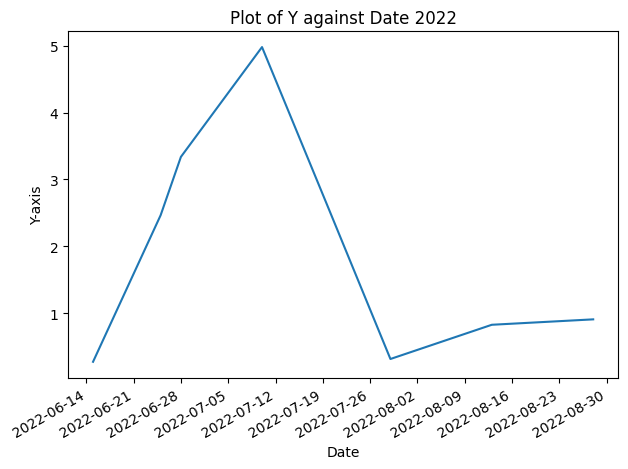

In [7]:
x = [datetime.strptime(date, '%Y-%m-%d') for date in newdates]
y = percentages

# Plot x and y
plt.plot(x, y)

# Set x-axis format as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Y-axis')
plt.title('Plot of Y against Date 2022')

# Show the plot
plt.tight_layout()
plt.show()
plt.show()

Color: (227, 245, 255) Count: 1
Color: (231, 254, 255) Count: 1
Color: (54, 248, 249) Count: 4
Color: (53, 248, 249) Count: 1
Color: (53, 247, 249) Count: 1
Color: (233, 246, 249) Count: 1
Color: (220, 240, 249) Count: 1
Color: (221, 243, 249) Count: 1
Color: (53, 247, 248) Count: 14
Color: (54, 247, 248) Count: 9
[227, 245, 255]
[231, 254, 255]
[54, 248, 249]
[53, 248, 249]
[53, 247, 249]
[233, 246, 249]
[220, 240, 249]
[221, 243, 249]
[53, 247, 248]
[54, 247, 248]


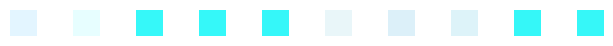

In [8]:
# Read the image
image = cv2.imread("./Images/20220720.png")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image to a 2D array of pixels
pixels = image_rgb.reshape(-1, 3)

# Count the occurrences of each unique color
color_counts = Counter(map(tuple, pixels))

# Sort colors based on their frequencies (in descending order)
sorted_colors = sorted(color_counts.items(), key=lambda x: x[0][2], reverse=True)

# Display the top N most abundant colors
top_colors = sorted_colors[:10]  # Adjust the number as needed
for color, count in top_colors:
    print("Color:", color, "Count:", count)

# Optionally, visualize the top colors
plt.figure(figsize=(8, 4))
for i, (color, count) in enumerate(top_colors):
    plt.subplot(10, 10, i+1)
    print([int(c) for c in color])
    plt.imshow([[[int(c) for c in color]]])
    plt.axis('off')
plt.show()

In [9]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
u, s, v = np.linalg.svd(gray_image, full_matrices=False) 
print(u.shape)
print(s.shape)
print(v.shape)
print(s.ndim)


(667, 659)
(659,)
(659, 659)
1


In [10]:
def svd_compressor(image, order):
    """Returns the compressed image channel at the specified order"""
    
    # Create an array filled with zeros having the shape of the image
    compressed = np.zeros(image.shape)
    
    # Get the U, S and V terms (S = SIGMA)
    U, S, V = np.linalg.svd(image)
    
    # Loop over U columns (Ui), S diagonal terms (Si) and V rows (Vi) until the chosen order
    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)
    
    return compressed

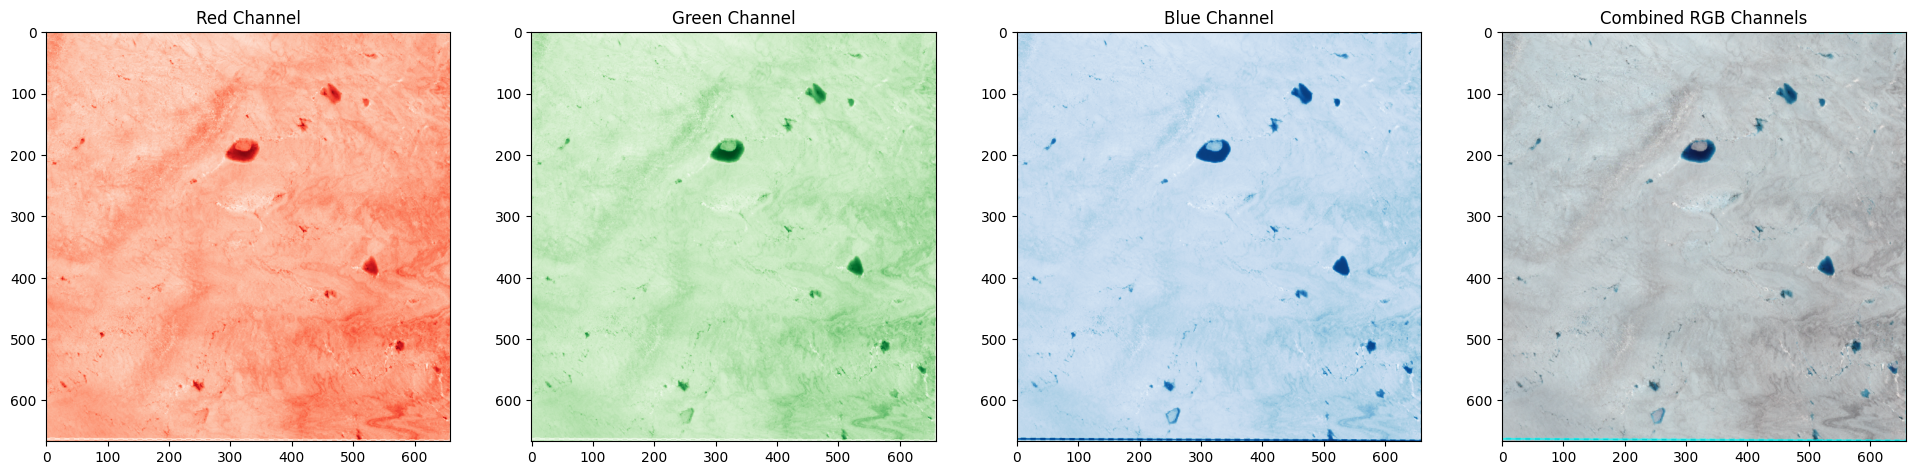

In [11]:
red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]

# Compression of each channel
order = 500
red_comp = svd_compressor(red_image, order)
green_comp = svd_compressor(green_image, order)
blue_comp = svd_compressor(blue_image, order)

# Recombinasion of the colored image, in BGR, not RGB
color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
color_comp[:, :, 2] = red_comp
color_comp[:, :, 1] = green_comp
color_comp[:, :, 0] = blue_comp


color_comp = np.around(color_comp).astype(int)

# Display of the 3 separated channels
plt.figure(figsize=(24, 8))
plt.subplot(141)
plt.imshow(red_comp, cmap='Reds_r')
plt.title("Red Channel")
plt.subplot(142)
plt.imshow(green_comp, cmap='Greens_r')
plt.title("Green Channel")
plt.subplot(143)
plt.imshow(blue_comp, cmap='Blues_r')
plt.title("Blue Channel")
plt.subplot(144)
plt.imshow(color_comp)
plt.title("Combined RGB Channels")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


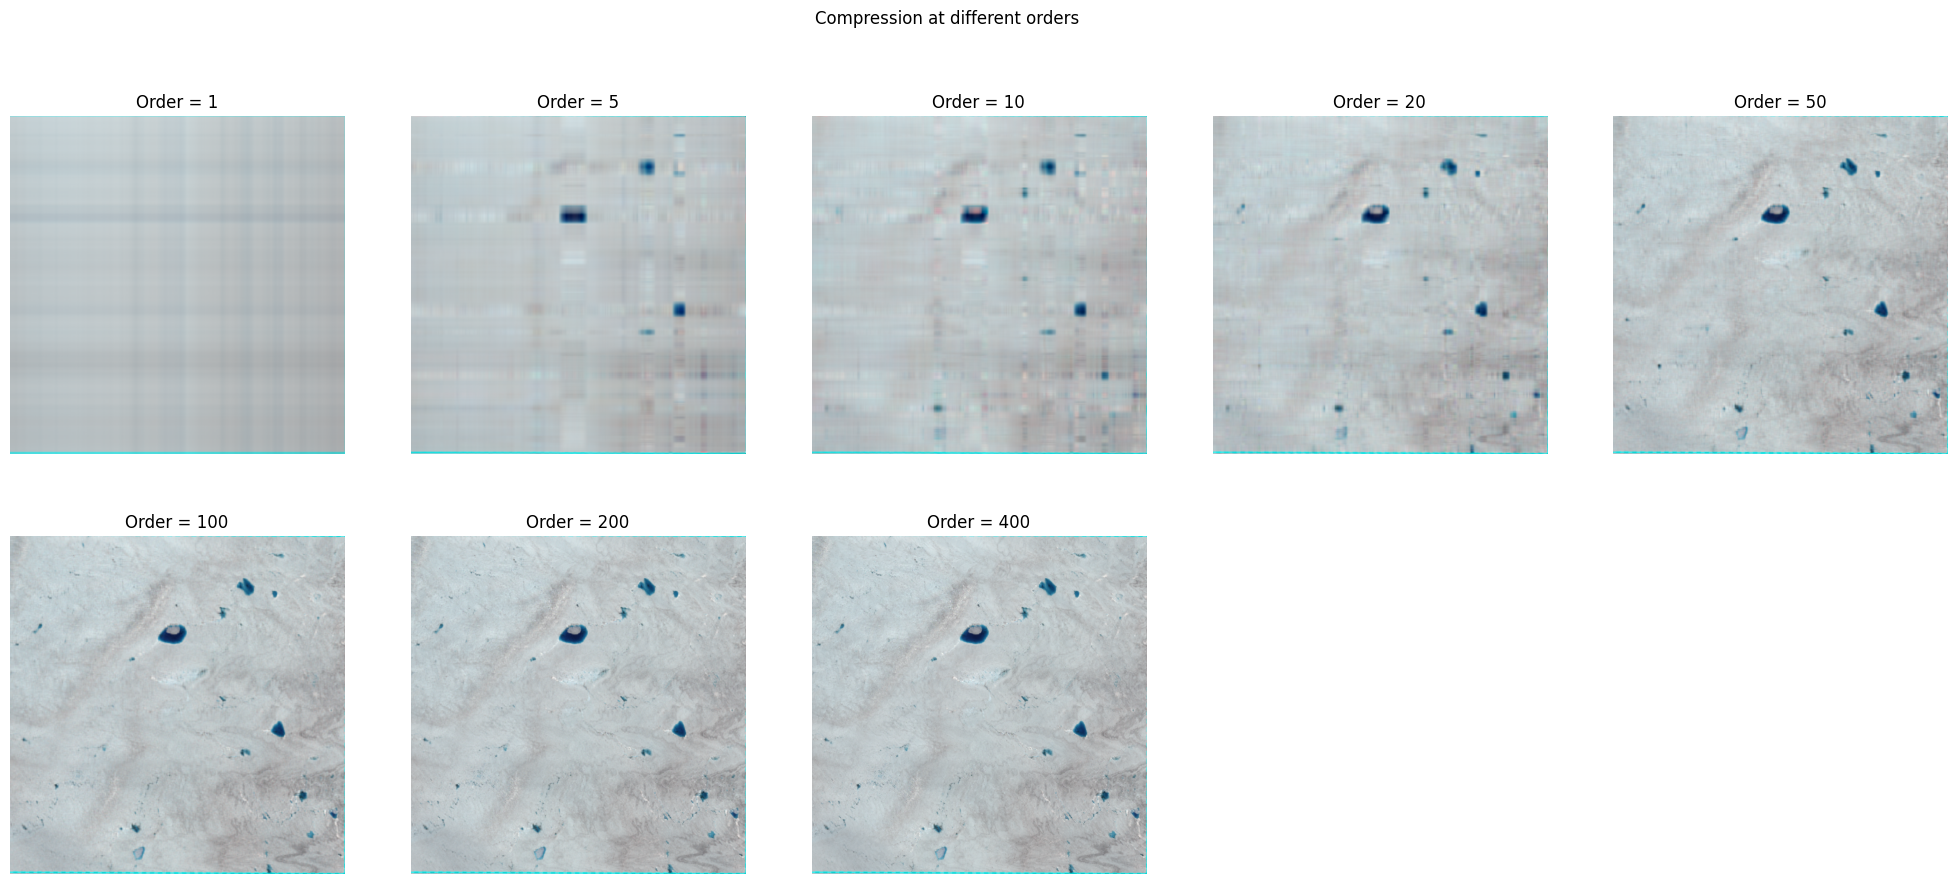

In [12]:
plt.figure(figsize=(25, 10))

orders = [1, 5, 10, 20, 50, 100, 200, 400]

for i in range(len(orders)):
    
    # Use the compressor function
    order = orders[i]
    red_comp = svd_compressor(red_image, order)
    green_comp = svd_compressor(green_image, order)
    blue_comp = svd_compressor(blue_image, order)
    
    # Combine images
    color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    color_comp[:, :, 2] = red_comp
    color_comp[:, :, 1] = green_comp
    color_comp[:, :, 0] = blue_comp
    color_comp = np.around(color_comp).astype(int)
    
    # Display the compressed colored image in the subplot
    plt.subplot(2, 5, i + 1)
    plt.title("Order = {}".format(order))
    plt.axis('off')
    plt.imshow(color_comp)

plt.suptitle('Compression at different orders')
plt.show()